# Формирование модели монетизации в игровом приложении «Космические братья»

В мобильной игре «Космические братья» пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта "разработка орбитальной сборки спутников"

Датасет содержит когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

**Цель исследования:** предложить стратегию  монетизации игрового приложения, основываясь на данных о поведении первых пользователей и рекламе.

**Декомпозиция задачи (ход выполнения):**

1. Открытие и изучение данных
- Изучение документации о датасетах
- Импорт библиотек, которые могут понадобиться для исследования
- Открытие данных из файла
- Проверка на соблюдение стиля наименований колонок
- Проверка на явные и неявные дубликаты
- Проверка на корректность типов данных
- Проверка на пропуски в данных
- Вывод по этапу

2. Предобработка данных 
- Корректировка названий при необходимости
- Обработка дубликатов при необходимости
- Обработка пропусков в данных при необходимости
- Изменение типов данных при необходимости
- Вывод по этапу

3. Исследовательский анализ данных 

- Вывод основных характеристик датасетов и мер центральной тенденции
- Проверка на временной охват
- Оценить рапределение пользователей по событиям 
- Оценить рапределение по типу построек
- Оценить ежедневную активность пользователей (DAU)
- Оценить удержание (Retention Rate)
- Оценить CAC (стоимость привлечения клиента)
- Вывод по этапу

4. Анализ влияния событий на совершение целевого события (завершение первого уровня игроком)
- Посмотреть среднее время прохождения уровня игроков выбравших военный путь победы
- Посмотреть среднее время прохождения уровня игроков выбравших путь реализации проекта
- Посмотреть среднее время оттока игроков непрошедших уровень
- Вывод по этапу

5. Проверка статистических гипотез 
- Проверка гипотезы различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком.
- Проверка гипотезы о различии времени прохождения первого уровня пользователями из различных источников траффика
- Вывод по этапу

6. Модель монетизации


7. Общий вывод и рекомендации


8. Построение дашборда
* Набор №1
    1. Построить диаграмму распределения количества построенных объектов
    2. Добавить индикатор количества пользователей
    3. Добавить фильтр дашборда по признаку завершения уровня
*  Набор №2
    1. Построить диаграмму, отображающую количество событий по дням
    2. Построить гистограмму, отображающую количество пользователей, пришедших из разных источников
    3. Добавить фильтр дашборда по типу события
    
9. Подготовка презентации

**Содержание**
    
    
1. [Открытие и изучение данных](#open)


2. [Предобработка данных](#prep)
        
        
3. [Исследовательский анализ](#eda)


4. [Анализ влияния событий на совершение целевого события](#an)


5. [Проверка гиппотез](#hyp)


6. [Модель монетизации](#mon)


7. [Общий вывод и рекомендации](#summary)


8. [Дашборд и презентация](#summary2)

<a id="open"></a>
## 1. Открытие и изучение данных

**Описание данных:**

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_costs.csv* содержит колонки:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

In [1]:
# Импортируем библиотеки

import pandas as pd
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import math as m
import scipy as sc
import warnings
import plotly.express as px
from plotly import graph_objects as go

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.3f}'.format)
pd.set_option('display.max_colwidth', 500)
pd.options.mode.chained_assignment = None

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

In [2]:
# Открываем таблицы

path = '/datasets/'
events = pd.read_csv(path +'game_actions.csv')
costs = pd.read_csv(path +'ad_costs.csv')
traffic = pd.read_csv(path +'user_source.csv')

In [3]:
# Изучаем таблицу events

display(events.sample(10))
events.tail(10)
events.head(5)
events.info()

,event_datetime,event,building_type,user_id,project_type
117536,2020-05-16 11:38:58,building,spaceport,7aaaba15-46ce-4dce-9c49-40d3e7b66aed,NaN
29643,2020-05-07 05:41:37,building,assembly_shop,f6e68b19-9917-4ca0-bc46-4c3f58bc625c,NaN
126447,2020-05-18 20:35:39,building,spaceport,15d4959a-e94d-4165-b8f9-789b9211097d,NaN
19039,2020-05-06 04:31:30,building,assembly_shop,4c11189f-600c-4bc5-b382-0d1c60a70cf3,NaN
98625,2020-05-13 12:56:55,building,spaceport,9e2e9872-8eab-4fcc-a650-16d02fc7eeb1,NaN
46036,2020-05-08 16:03:06,building,assembly_shop,4ec9957b-c1fd-4497-9117-25c758271a72,NaN
90398,2020-05-12 11:27:58,building,spaceport,d990f9bf-2c6c-4a25-9679-19e07d482b03,NaN
10399,2020-05-05 06:04:59,building,spaceport,1d311498-6af1-4ea2-941e-d971945f53cf,NaN
107695,2020-05-14 19:21:56,building,spaceport,7718ea2c-f63e-4e3f-b4e5-6df443187f0f,NaN
129919,2020-05-20 09:27:15,building,spaceport,0850a0ab-c90e-41c0-b009-0fcb973a80fd,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


In [4]:
# Изучаем таблицу costs

display(costs.sample(10))
costs.tail(10)
costs.head(5)
costs.info()

,source,day,cost
23,youtube_channel_reklama,2020-05-05,147.042
6,facebook_ads,2020-05-09,38.723
17,yandex_direct,2020-05-06,180.917
2,facebook_ads,2020-05-05,260.186
9,instagram_new_adverts,2020-05-05,313.971
18,yandex_direct,2020-05-07,114.429
21,youtube_channel_reklama,2020-05-03,454.225
0,facebook_ads,2020-05-03,935.883
8,instagram_new_adverts,2020-05-04,502.925
15,yandex_direct,2020-05-04,554.651


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [5]:
# Изучаем таблицу traffic

display(traffic.sample(10))
traffic.tail(10)
traffic.head(5)
traffic.info()

,user_id,source
10744,ca88179a-eae4-4961-825e-efc8f67f25ec,yandex_direct
10656,c8f184aa-ad67-44da-8cf9-b30e936c87cc,facebook_ads
821,0f1f5f2c-b187-4110-971d-e0d95a4d8a83,youtube_channel_reklama
8576,a1cb11d5-9a8c-4497-aaf6-ef35bc831336,yandex_direct
4069,4af345ef-533a-4dda-96cb-6db4e24abfe8,yandex_direct
8415,9ec06422-9e25-4e0c-880e-ba9c0a565807,instagram_new_adverts
9646,b614a737-1f32-4143-a1ca-1837c8ffc8db,instagram_new_adverts
10499,c6266e53-6ea3-4676-8f1d-18747de8d56f,facebook_ads
6346,761f0f95-dedf-40e5-b283-dd432c1e70e8,instagram_new_adverts
11124,d2bacfc0-b15d-42c9-a762-53f362a29b81,yandex_direct


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


* В таблице events 135640 записей
* В таблице costs 28 записей
* В таблице traffic 13576 записей

Наименования колонок во всех трех датафреймах выполнены в одном "змеином" стиле.

Проверим датафреймы на явные полные дубликаты

In [6]:
ds = [events, costs, traffic]
for d in ds:
    print(d.duplicated().sum())

1
0
0


Поищем неявные дубликаты в категориальных переменных

In [7]:
print(events['event'].unique(), end='\n\n')
print(events['building_type'].unique(), end='\n\n')
print(events['project_type'].unique(), end='\n\n')
print(costs['source'].unique(), end='\n\n')
print(traffic['source'].unique())

['building' 'finished_stage_1' 'project']

['assembly_shop' 'spaceport' nan 'research_center']

[nan 'satellite_orbital_assembly']

['facebook_ads' 'instagram_new_adverts' 'yandex_direct'
 'youtube_channel_reklama']

['facebook_ads' 'yandex_direct' 'youtube_channel_reklama'
 'instagram_new_adverts']


Неявных дубликатов не обнаружено.

Не все типы данных выглядят корректно:
* event_datetime из events следует привести к типу datetime
* day из costs следует привести к типу datetime.

В таблицах имеются пропуски:
* В events building_type пропущено 5.6% значений
* В events project_type пропущено 98.6% значений.

Характер полей с пропусками не позволяет заполнить их какими-либо осмысленными данными. Будем считать,что пропуски в building_type говорят об отсутствии построек пользователями, а пропуски в project_type означают, что лишь очень малая часть пользователей завершила проект "разработка орбитальной сборки спутников". Проверим последнюю гипотезу на данных.

In [8]:
projnotna =events.query('project_type.notna()')
print(projnotna['event'].value_counts())

events.query('event=="project"').shape

project    1866
Name: event, dtype: int64


(1866, 5)

У всех пользователей с заполненным project_type - проект завершён и кол-во записей с завершенным проектом равны кол-ву записей с заполненным project_type. Видимо гипотеза верна - тогда пропуски связаны с механикой сбора данных, и не являются ошибками.


### Вывод

Данные были открыты и изучены. 
* В таблице events 135640 записей
* В таблице costs 28 записей
* В таблице traffic 13576 записей
* Наименования колонок во всех трех датафреймах выполнены в одном "змеином" стиле.
* В данных присутствует 1 полный дубликат, неявные дубликаты не обнаружены.
* Не все типы данных выглядят корректно: event_datetime из events следует привести к типу datetime, day из costs следует также привести к типу datetime.
* В таблицах имеются пропуски: в events building_type пропущено 5.6% значений, в events project_type пропущено 98.6% значений. Данные пропуски не требуют заполнения.

<a id="prep"></a>
## 2. Предобработка данных

В соответствии с выводами предыдущего раздела удалим полный дубликат.

In [9]:
events = events.drop_duplicates()
print(events.shape)

(135639, 5)


А также изменим типы данных колонок с датой.

In [10]:
events['event_datetime'] = events['event_datetime'].astype('datetime64')
events.info()
display(events.head(3))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN


In [11]:
costs['day'] = costs['day'].astype('datetime64')
costs.info()
display(costs.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     datetime64[ns]
 2   cost    28 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 800.0+ bytes


,source,day,cost
0,facebook_ads,2020-05-03,935.883
1,facebook_ads,2020-05-04,548.354
2,facebook_ads,2020-05-05,260.186


### Вывод

Предобработка данных в соответствии с нашими выводами завершена.


<a id="eda"></a>
## 3. Исследовательский анализ

**Выведем основные характеристики и меры центральной тенденции датафрэймов**

In [12]:
display(events.describe().T)

,count,unique,top,freq,first,last
event_datetime,135639,128790,2020-05-10 03:08:18,4,2020-05-04 00:00:01,2020-06-05 12:32:49
event,135639,3,building,127956,NaT,NaT
building_type,127956,3,spaceport,59325,NaT,NaT
user_id,135639,13576,ff841992-d93b-462e-bc6e-18c24a514f36,22,NaT,NaT
project_type,1866,1,satellite_orbital_assembly,1866,NaT,NaT


Можем видеть, что период логирования действий игроков охватывает с 4 мая по 5 июня 2020 г. Уникальных пользователей 13576. 

In [13]:
display(costs.describe().T)

,count,mean,std,min,25%,50%,75%,max
cost,28.000,271.556,286.868,23.315,66.747,160.056,349.034,969.139


In [14]:
print('Начало периода costs: ', min(costs.day))
print('Конец периода costs: ', max(costs.day))

Начало периода costs:  2020-05-03 00:00:00
Конец периода costs:  2020-05-09 00:00:00


Данные о рекламной кампании имеются за период c 3 мая по 9 мая. Известно, что датасет содержит когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Средние затраты составили 271. Разброс затрат большой: от 23 до 969, разброс подтверждается также высоким стандартным отклонением (286).

In [15]:
display(traffic.describe().T)

,count,unique,top,freq
user_id,13576,13576,26bb6bcd-da7e-44d9-898f-6ab75ade65ed,1
source,13576,4,yandex_direct,4817


Данные по исчточнику траффика имеются по всем (13576) уникальным пользователм датасета. Всего 4 источника.

**Посмотрим на рапределение типов событий**

,index,event,share
0,building,127956,94.340
1,finished_stage_1,5817,4.290
2,project,1866,1.380


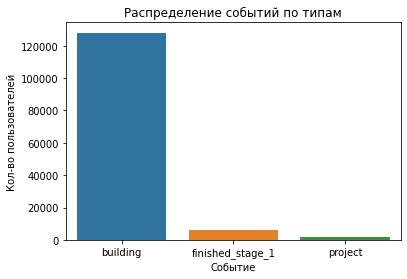

In [16]:
# events_users = events.pivot_table(index='event',values='user_id',aggfunc='nunique').reset_index().sort_values(by='user_id', ascending=False)

events_users = events['event'].value_counts().reset_index()
events_users['share'] = (events_users['event']/events_users['event'].sum()*100).round(2)
display(events_users)

bar = sb.barplot(y='event', x='index', data=events_users.sort_values(by='share', ascending=False))
sb.set(rc = {'figure.figsize':(14,7)})
bar.set(xlabel='Событие', ylabel='Кол-во пользователей', title='Распределение событий по типам')
plt.show()

# print('Среднее количество пользователей на событие:', events_users['user_id'].mean().astype('int'))

128 тыс. (около 94%) событий приходится на строительство зданий, 5817 (около 4.5%) событий на факт прохождения первого уровеня, только 1866 (около 1.5%) событий на факт реализации проекта.

Посмотрим на долю уникальных пользователей завершивших первый уровень

In [17]:
users_win_share = events[events['event']=='finished_stage_1']['user_id'].nunique() / events['user_id'].nunique()
print('Доля прошедших уровень пользователей:',round(users_win_share,3)*100)

Доля прошедших уровень пользователей: 42.8


In [18]:
users_win_proj_share = events[events['event']=='project']['user_id'].nunique() / events[events['event']=='finished_stage_1']['user_id'].nunique()
print('Доля прошедших уровень реализацией проекта среди победителей:',round(users_win_proj_share,3)*100)

Доля прошедших уровень реализацией проекта среди победителей: 32.1


Около 43% среди всех пользователей прошли первый уровень, из них около 32% прошли его через реализацию проекта. Соответственно, среди прошедших первый уровень остальные две трети игроков выбрали военный путь достижения цели.

**Посмотрим на рапределение типа построек**

,index,building_type,share
0,spaceport,59325,46.360
1,assembly_shop,54494,42.590
2,research_center,14137,11.050


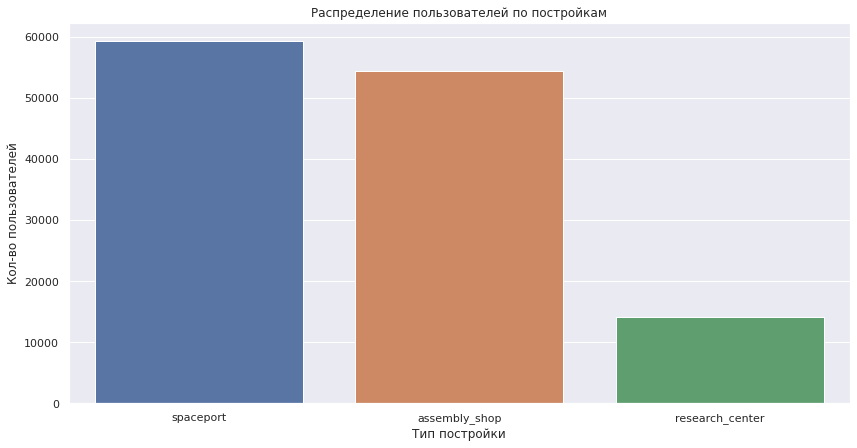

In [19]:
buildings_users = events['building_type'].value_counts().reset_index()
buildings_users['share'] = (buildings_users['building_type']/buildings_users['building_type'].sum()*100).round(2)
display(buildings_users)

bar = sb.barplot(y='building_type', x='index', data=buildings_users.sort_values(by='share', ascending=False))
sb.set(rc = {'figure.figsize':(14,7)})
bar.set(xlabel='Тип постройки', ylabel='Кол-во пользователей', title='Распределение пользователей по постройкам')
plt.show()


59 тыс. построек (около 46%) приходится на spaceport, 54 тыс. (около 43%) на assembly_shop и только 14 тыс. (около 11%) на research_center.

**Посмотрим на ежедневную активность пользователей (DAU) в разрезе источников траффика**

,event_date,source,user_id
12,2020-05-07,facebook_ads,1535
19,2020-05-08,youtube_channel_reklama,1562
45,2020-05-15,instagram_new_adverts,1175
105,2020-05-30,instagram_new_adverts,10
75,2020-05-22,youtube_channel_reklama,148


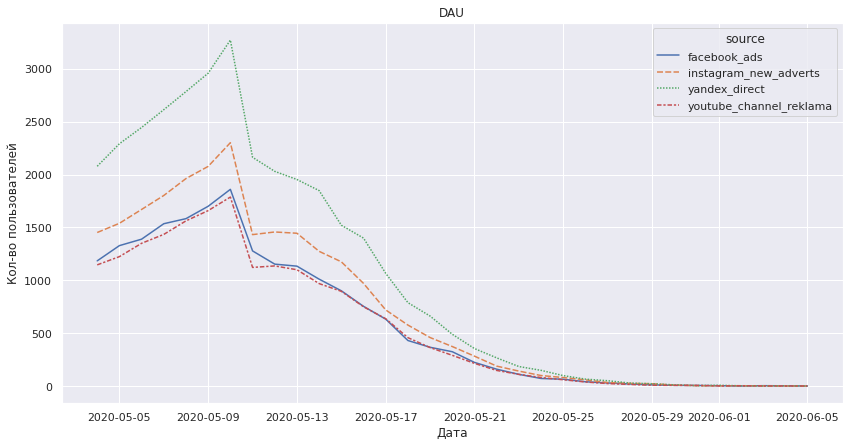

Медианное значение DAU по всей выборке: 1480 пользователей в день


In [20]:
events['event_date'] = pd.to_datetime(events['event_datetime']).dt.date
events_traffic = events.merge(traffic, how='left', on='user_id')
dau = events_traffic.groupby(['event_date', 'source']).agg({'user_id':'nunique'}).sort_values(['event_date', 'source']).reset_index()
display(dau.sample(5))

# Построим график
plt.figure(figsize=(14,7))
plt.xlabel('Дата')
plt.ylabel('Кол-во пользователей')
plt.title('DAU')
sb.lineplot(data=dau, x="event_date", y="user_id", hue="source", style="source")
plt.show()

dau_mean = events.groupby('event_date')['user_id'].nunique().reset_index()
print('Медианное значение DAU по всей выборке:',format(int(dau_mean.median())),'пользователей в день')

В первую неделю наблюдается рост активности по всем каналам в связи с рекламной кампанией. После 10 мая по ее завершению виден резкий спад активности, продолжающийся вплоть до конца периода исследования. После 25 мая активности почти нет, это может быть связано с тем, что данные приведены только о пользователях на первом уровне игры, который к 25 маю почти все игроки преодолели либо забросили игру. Наибольшая активность видна среди пользователей пришедших из канала yandex_direct, на втором месте из instagram. Активность траффика из остальных каналов примерно одинакова.

**Оценим удержание пользователей (Retention Rate)**

Определим первое действие каждого уникального пользователя

In [21]:
first_user_act = events_traffic.groupby('user_id')['event_date'].min().reset_index()
first_user_act.columns = ['user_id','first_user_act']
events_traffic = pd.merge(events_traffic, first_user_act, how='left', on='user_id')
display(events_traffic.sample(6))

,event_datetime,event,building_type,user_id,project_type,event_date,source,first_user_act
14973,2020-05-05 18:08:01,building,assembly_shop,3f0b6af6-a5e7-46df-b2dc-910f7caa6fed,NaN,2020-05-05,facebook_ads,2020-05-05
93560,2020-05-12 21:06:41,building,spaceport,96fbf3d3-d23c-4cfc-87a5-66bc8890108c,NaN,2020-05-12,instagram_new_adverts,2020-05-06
75793,2020-05-10 20:05:04,building,spaceport,e47f5780-7848-4ef1-a440-7433d6e8e1c7,NaN,2020-05-10,instagram_new_adverts,2020-05-04
85018,2020-05-11 19:30:40,building,spaceport,ec7a26e8-be91-4352-9ebb-e341ca7d312d,NaN,2020-05-11,instagram_new_adverts,2020-05-06
56265,2020-05-09 11:49:35,finished_stage_1,NaN,9048ee38-f48e-44ee-9188-0af3553b5ce3,NaN,2020-05-09,youtube_channel_reklama,2020-05-06
129519,2020-05-20 04:31:23,building,research_center,6c7f5d43-7b59-46a9-bc19-bbd3f3fb5cb5,NaN,2020-05-20,yandex_direct,2020-05-07


Найдем лайфтайм, как разницу между текущим и первым дейтсвием пользователя в рамках когорты в неделях.

In [22]:
events_traffic['first_user_act'] = pd.to_datetime(events_traffic['first_user_act'])
events_traffic['event_date'] = pd.to_datetime(events_traffic['event_date'])
events_traffic['lifetime']=((events_traffic['event_date']-events_traffic['first_user_act'])/np.timedelta64(1,'W')).round().astype(int)
display(events_traffic.sample(5))

,event_datetime,event,building_type,user_id,project_type,event_date,source,first_user_act,lifetime
132355,2020-05-22 00:18:41,building,spaceport,896eccba-2ecd-471b-a3f5-512f5dabb15d,NaN,2020-05-22,yandex_direct,2020-05-09,2
99598,2020-05-13 16:02:10,building,research_center,912d8bd6-f105-4092-8765-57f50b218aa5,NaN,2020-05-13,instagram_new_adverts,2020-05-06,1
63825,2020-05-10 01:04:04,building,research_center,0587fefd-2b92-4a30-afeb-4a0fb27763ef,NaN,2020-05-10,youtube_channel_reklama,2020-05-04,1
98970,2020-05-13 13:59:01,building,spaceport,148da3bb-5441-40a8-a682-6993494a3eb0,NaN,2020-05-13,yandex_direct,2020-05-05,1
63681,2020-05-10 00:47:38,building,assembly_shop,b92265a4-6cfa-4fe2-b905-17ee707dc5d1,NaN,2020-05-10,instagram_new_adverts,2020-05-06,1


Сгруппируем активность по первому дню и лайфтайм, вычислим для каждой когорты количество активных пользователей на определённую неделю и начальное кол-во пользователей в когорте.

In [23]:
cohort = events_traffic.groupby(['first_user_act','lifetime'])['user_id'].nunique().reset_index().rename(columns={'user_id':'cnt_users'})
cohort.sample(5)
# Найдем начальное кол-во пользователей в когорте
init_amount = cohort[cohort['lifetime'] == 0][['first_user_act','cnt_users']].rename(columns={'cnt_users':'users_cohort'})
init_amount.sample(5)
# Объединим информацию по когортам с исходным количеством пользователей в них.
cohort = cohort.merge(init_amount,on='first_user_act')
cohort.sample(5)

,first_user_act,lifetime,cnt_users,users_cohort
29,2020-05-09,4,1,440
7,2020-05-05,2,1666,3361
1,2020-05-04,1,5761,5860
31,2020-05-10,1,246,271
3,2020-05-04,3,421,5860


Теперь мы можем расчитать retention rate

In [24]:
cohort['retention'] = cohort['cnt_users']/cohort['users_cohort'] 

# Сделаем сводную таблицу
cohort['first_user_act'] = pd.to_datetime(cohort['first_user_act']).dt.date
retention_pivot = cohort.pivot_table(index='first_user_act',columns='lifetime',values='retention',aggfunc='sum')
# retention_pivot.columns=['0','1','2','3','4']
retention_pivot.loc['mean'] = retention_pivot.mean()
display(retention_pivot)

lifetime,0,1,2,3,4
first_user_act,,,,,
2020-05-04,1.000,0.983,0.556,0.072,0.003
2020-05-05,1.000,0.972,0.496,0.058,0.004
2020-05-06,1.000,0.947,0.439,0.056,0.003
2020-05-07,1.000,0.902,0.418,0.072,0.009
2020-05-08,1.000,0.887,0.392,0.048,0.003
2020-05-09,1.000,0.898,0.400,0.066,0.002
2020-05-10,1.000,0.908,0.410,0.048,NaN
mean,1.000,0.928,0.444,0.060,0.004


Text(0.5, 57.5, 'День жизни')

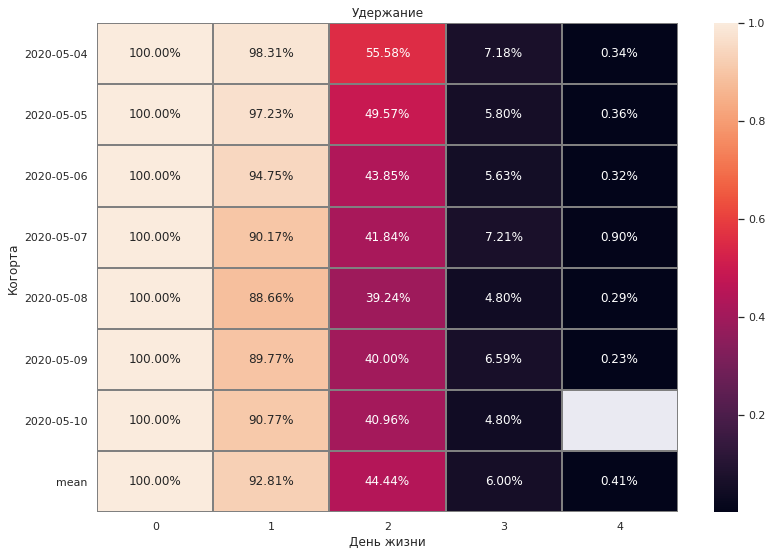

In [25]:
# Построим тепловую карту
sb.set(style='dark')
plt.figure(figsize=(13, 9))
plt.title('Удержание')
hm = sb.heatmap(retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='gray')
hm.set_ylabel('Когорта')
hm.set_xlabel('День жизни')

На третьей неделе средний Retention Rate по когортам составляет уже 44%, а затем резко уменьшается до 6%. Вероятно, спад связан с прохождением уровня у одних пользователей и отсутствием дальнейшего интереса у других. Когорта от 5 мая ведет себя лучше других, особенно это заметно на 2-ю неделю жизни.

**Оценим CAC (стоимость привлечения клиента)**

Прежде всего необходимо рассчитать затраты на каждый рекламный источник

In [26]:
costs_sum = costs.groupby('source')['cost'].sum().sort_values(ascending=False).reset_index()
display(costs_sum)

,source,cost
0,yandex_direct,"2,233.111"
1,instagram_new_adverts,"2,161.442"
2,facebook_ads,"2,140.905"
3,youtube_channel_reklama,"1,068.119"


Посмотрим, сколько всего пользователей было привлечено по рекламным источникам:

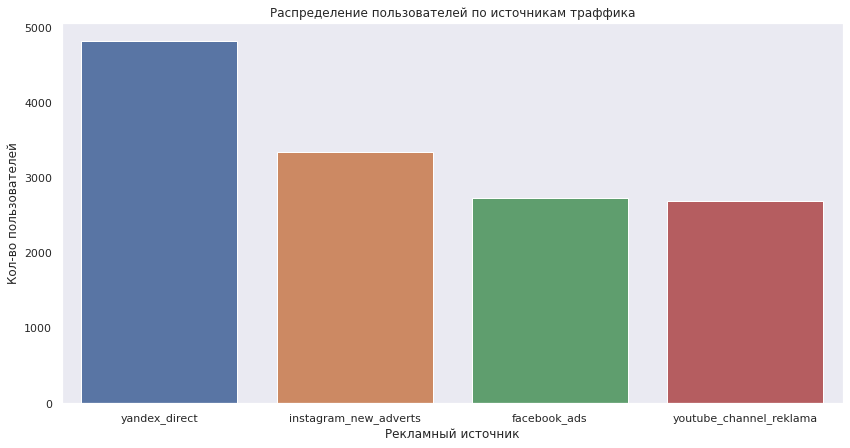

In [27]:
source_users_cnt = traffic.groupby('source').agg({'user_id':'nunique'}).sort_values(by='user_id', ascending=False).reset_index()
# display(source_users_cnt)

# Построим график
bar = sb.barplot(y='user_id', x='source', data=source_users_cnt)
sb.set(rc = {'figure.figsize':(14,7)})
bar.set(xlabel='Рекламный источник', ylabel='Кол-во пользователей', title='Распределение пользователей по источникам траффика')
plt.show()

Как мы видим, больше всего траффика привлечено по каналу yandex_direct. 

Соберем сводную таблицу по затратам на рекламу по дням.

day,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,total
source,,,,,,,,
facebook_ads,935.883,548.354,260.186,177.982,111.767,68.009,38.723,"2,140.905"
instagram_new_adverts,943.205,502.925,313.971,173.071,109.915,71.579,46.775,"2,161.442"
yandex_direct,969.139,554.651,308.233,180.917,114.429,62.962,42.780,"2,233.111"
youtube_channel_reklama,454.225,259.073,147.042,88.506,55.741,40.218,23.315,"1,068.119"
total,"3,302.452","1,865.005","1,029.431",620.477,391.852,242.768,151.593,"7,603.577"


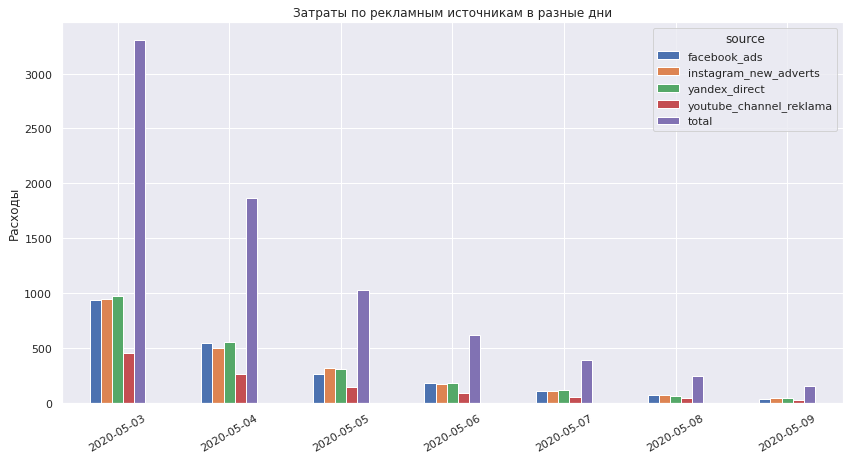

In [28]:
costs['day'] = pd.to_datetime(costs['day']).dt.date
pivot_costs = costs.pivot_table(index='source', columns='day', values='cost', aggfunc='sum', margins=True, margins_name='total')
display(pivot_costs)
print()
pivot_costs.drop('total', axis=1, inplace=True)

# Построим грфик
pivot_costs.T.plot(kind='bar', figsize=(14,7), grid=True)
plt.title('Затраты по рекламным источникам в разные дни')
plt.ylabel('Расходы')
plt.xlabel('')
plt.xticks(rotation=30)
plt.show()

Общие затраты на рекламу составили около 3300 в первый день, а затем снижались вплоть до 152 в последний день периода. При этом затраты по каналу yandex_direct всегда немного опережали другие каналы. Меьшего всего (во всем периоде) было потрачено на рекламу по youtube_channel_reklama.

**Вычислим стоимость привлечения клиента (CAC)**

In [29]:
cac = source_users_cnt.merge(costs_sum, on ='source')
cac['cac'] = round(cac['cost']/cac['user_id'],3)
display(cac.sort_values('cac'))

,source,user_id,cost,cac
3,youtube_channel_reklama,2686,"1,068.119",0.398
0,yandex_direct,4817,"2,233.111",0.464
1,instagram_new_adverts,3347,"2,161.442",0.646
2,facebook_ads,2726,"2,140.905",0.785


Наименьший CAC (0.4) получился у канала youtube_channel_reklama. Самым дорогим оказался facebook_ads (0.79)

### Вывод

Произведен исследовательский анализ данных.
Были рассмотрены основные характеристики датасетов. Мы увидели, что:
* период логирования действий игроков охватывает с 4 мая по 5 июня 2020 г. Уникальных пользователей 13576. 
* данные о рекламной кампании имеются за период c 3 мая по 9 мая.
* средние затраты составили 271. Разброс затрат большой: от 23 до 969, разброс подтверждается также высоким стандартным отклонением (286).
* данные по исчточнику траффика имеются по всем (13576) уникальным пользователм датасета. Всего 4 источника.

Показано рапределение типов событий
* 128 тыс. (около 94%) событий приходится на строительство зданий, 5817 (около 4.5%) событий на факт прохождения первого уровеня, только 1866 (около 1.5%) событий на факт реализации проекта.
* около 43% среди всех пользователей прошли первый уровень, из них около 32% прошли его через реализацию проекта. Соответственно, среди прошедших первый уровень остальные две трети игроков выбрали военный путь достижения цели.

Показано рапределение типа построек
* 59 тыс. построек (около 46%) приходится на spaceport, 54 тыс. (около 43%) на assembly_shop и только 14 тыс. (около 11%) на research_center.

Рассмотрена ежедневная активность пользователей (DAU) в разрезе источников траффика:
* В первую неделю наблюдается рост активности по всем каналам в связи с рекламной кампанией. После 10 мая по ее завершению виден резкий спад активности, продолжающийся вплоть до конца периода исследования, что быть связано с прохождением первого уровня, который к 25 маю почти все пользователи преодолели, либо забросили игру.
* Наибольшая активность видна среди пользователей пришедших из канала yandex_direct, на втором месте из instagram. 
* Активность траффика из остальных каналов примерно одинакова.

Было оценено удержание пользователей (Retention Rate):
* На третьей неделе средний Retention Rate по когортам составил уже 44%, а затем резко уменьшается до 6%. 
* Вероятно, спад связан с прохождением уровня у одних пользователей и отсутствием дальнейшего интереса у других. 
* Когорта от 5 мая ведет себя лучше других, особенно это заметно на 2-ю неделю жизни.

Была оценена CAC (стоимость привлечения клиента)
* Общие затраты на рекламу составили около 3300  в первый день, а затем снижались вплоть до 152 в последний день периода. При этом затраты по каналу yandex_direct всегда немного опережали другие каналы. Меьшего всего (во всем периоде) было потрачено на рекламу по youtube_channel_reklama.
* Наименьший CAC (0.4) получился у канала youtube_channel_reklama. Самым дорогим оказался facebook_ads (0.79) - стоит провести дополнительное исследование по вопросу перераспределения средств на маркетинг.

<a id="an"></a>
## 4. Анализ влияния событий на совершение целевого события

Целевым событием является завершение первого уровня, так как в рамках первого уровня заказчик хочет завлечь как можно больше пользователей в игру (согласно ТЗ).

Найдем кол-во дней активности пользователя.

In [30]:
events.query('project_type.notna()')[['user_id','project_type']]

,user_id,project_type
47121,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly
...,...,...
135602,9d98001c-7e14-40d7-896e-46b3047365fd,satellite_orbital_assembly
135603,df4a1e13-eba9-4928-a7cf-ee303d6f80f9,satellite_orbital_assembly
135609,82e46f34-e243-4728-8e20-2e171fc33ea4,satellite_orbital_assembly
135617,fe032991-71e0-48c5-889f-4c3805ba4c9b,satellite_orbital_assembly


In [31]:
# Дата первого действия по юзерам.
first_user_act = events.groupby('user_id')['event_datetime'].min().reset_index()
first_user_act.columns = ['user_id','first_user_act']

# Дата последнего действия по юзерам.
last_user_act = events.groupby('user_id')['event_datetime'].max().reset_index()
last_user_act.columns = ['user_id','last_user_act']

# Объединим таблицы с нужными признаками
users = (first_user_act.merge(last_user_act, on='user_id')
           .merge(events.query('project_type.notna()')[['user_id','project_type']] , on='user_id', how='left')
           .merge(events[['user_id','event','event_datetime']],
           left_on=['user_id', 'last_user_act'], right_on=['user_id', 'event_datetime'], how='left'))
# users

#Найдем кол-во дней активности пользователя
users['action_days'] = (users['last_user_act'] - users['first_user_act']).astype('timedelta64[D]').astype('int')
display(users.sample(3))

,user_id,first_user_act,last_user_act,project_type,event,event_datetime,action_days
10164,bff35ff1-66d3-4dd6-ae0e-b765e0d47cda,2020-05-04 02:57:17,2020-05-13 23:43:01,NaN,finished_stage_1,2020-05-13 23:43:01,9
6407,775d3f74-6d85-40b7-b615-c9f7268a53a7,2020-05-04 22:05:58,2020-05-12 19:36:32,NaN,finished_stage_1,2020-05-12 19:36:32,7
7115,84a980a4-0bdb-427e-9c71-031c09718e17,2020-05-04 09:10:09,2020-05-18 06:40:44,NaN,finished_stage_1,2020-05-18 06:40:44,13


Посмотрим сколько дней в среднем потребовалось игрокам для прохождения уровня через реализацию проекта (игрокам-строителям) и через победу над врагом (игрокам-воинам)

In [32]:
users_builders = users.query('project_type.notna()')
users_warriors = users.query('project_type.isna() and event=="finished_stage_1"')

print('Среднее время прохождения уровня у игроков-строителей:', round(users_builders['action_days'].mean(),1), 'дней.')
print('Среднее время прохождения уровня у игроков-воинов:', round(users_warriors['action_days'].mean(),1), 'дней.')

Среднее время прохождения уровня у игроков-строителей: 13.0 дней.
Среднее время прохождения уровня у игроков-воинов: 10.6 дней.


Посмотрим сколько дней в среднем играли те, кто в итоге не завершил первый уровень (остановился на очередной постройке)

In [33]:
users_leavers = users.query('event == "building"')

print('Среднее время игры у игроков оставивших игру:', round(users_leavers['action_days'].mean(),1), 'дней.')

Среднее время игры у игроков оставивших игру: 9.3 дней.


### Вывод

В среднем, игроки-строители проводят в игре на 2.6 дня больше, чем игроки-воины (13 дней против 10.6 дней). Можно сказать, что игроки-строители - наиболее ценные пользователи с точки зрения удержания и монетизации. 

Также мы выяснили, что среднее время до оттока у остальных игроков - 9.3 дня. Вероятно, этим игрокам надоедает процесс строительства, возможно для них особенно актуален был бы платный ускоритель развития.

<a id="hyp"></a>
## 5. Проверка статистических гипотез 

**Проверим гипотезу различия времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком**

Воспользуемся T-критерием Стьюдента. 

Нулевая гипотеза: статистически значимых различий между средним временем прохождения уровня пользователями из двух выборок отсутствует.

Гипотеза Н1: статистически значимые различия между средним временем прохождения уровня пользователями из двух выборок есть.

In [34]:
disp_diff = (100- np.var(users_builders['action_days'], ddof=1)/np.var(users_warriors['action_days'], ddof=1)*100)
print('Различие в дисперсии выборок составляет:', disp_diff.round(1), '%')

Различие в дисперсии выборок составляет: 26.2 %


In [35]:
# Перейдем к проверки с параметром equal_var = False

alpha = 0.05

results = sc.stats.ttest_ind(users_builders['action_days'], users_warriors['action_days'], equal_var=False)
print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, статистически значимое различие средних между выборками есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимое различие средних между выборками отсутствует')

p-value: 2.6237027268062713e-106
Отвергаем нулевую гипотезу, статистически значимое различие средних между выборками есть


**Проверим гипотезу о различии времени прохождения первого уровня пользователями из различных источников траффика**

В связи с одновременной проверкой 4-х выборок воспользуемся критерием Краскела-Уоллиса.

Нулевая гипотеза: между четырьмя выборками по различным рекламным каналам существуют лишь случайные различия по времени прохождения уровня.

Гипотеза Н1: между четырьмя выборками по различным рекламным каналам существуют неслучайные различия по времени прохождения уровня.

In [36]:
# Добавим источники траффика в датафрейм users
users = users.merge(traffic[['user_id','source']], on='user_id', how='left')
# users

In [37]:
# Проведем тест
alpha = 0.05

results = sc.stats.kruskal(users['action_days'][users['source']=='instagram_new_adverts'],
              users['action_days'][users['source']=='youtube_channel_reklama'],                           
              users['action_days'][users['source']=='facebook_ads'],
              users['action_days'][users['source']=='yandex_direct'])

print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, различия по времени прохождения уровня между выборками неслучайны")
else:
    print("Не получилось отвергнуть нулевую гипотезу, различия по времени прохождения уровня между выборками случайны") 

p-value:  0.2544880661165931
Не получилось отвергнуть нулевую гипотезу, различия по времени прохождения уровня между выборками случайны


### Вывод

Согласно результатам статистических тестов, можно сказать, что: 
* есть статистически значимое различие среднего времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком. Это логично, постройка всех необходимых зданий занимает больше времени, чем сражение с другим игроком.
* нет статистически значимой разницы по времени прохождения уровня между пользователями, пришедшими из разных источников траффика
* поскольку стратегия pvp явно популярнее среди игроков, возникает игровой дисбаланс, который в конечном счете может привести к  потерям прибыли. Рекомендуем геймдизайнерам по возможности сократить дисбаланс в выборе стратегий победы.

<a id="mon"></a>
## 6. Модель монетизации

Посчитаем цену показа одного баннера в окне постройки длявыхода на уровень окупаемости исходя из CAC и количества построек производимых игроками.

Ранее мы посчитали CAC для различных источников траффика:

In [38]:
display(cac)
cac_mean = round(cac['cac'].mean(),2)
print('Средний CAC:',cac_mean)

,source,user_id,cost,cac
0,yandex_direct,4817,"2,233.111",0.464
1,instagram_new_adverts,3347,"2,161.442",0.646
2,facebook_ads,2726,"2,140.905",0.785
3,youtube_channel_reklama,2686,"1,068.119",0.398


Средний CAC: 0.57


Теперь посмотрим на среднее количество построек возводимых игроками, выделив, также средние по самому "дорогому" и самому "дешевому" каналу.

In [39]:
traffic_buildings = events.merge(traffic, on ='user_id', how='left')
user_buildings = traffic_buildings.query('event == "building"').groupby('user_id')['event'].count().reset_index()

avg_buildings_youtube = round(traffic_buildings.query('event=="building" and source=="youtube_channel_reklama"').groupby('user_id').agg({'building_type':'count'}).mean(),2)
avg_buildings_facebook = round(traffic_buildings.query('event=="building" and source=="facebook_ads"').groupby('user_id').agg({'building_type':'count'}).mean(),2)
avg_buildings = round(events.query('event=="building"').groupby('user_id').agg({'building_type': 'count'}).mean(),2)

print('Среднее кол-во построек на одного игрока пришедшего из youtube_channel_reklama:',avg_buildings_youtube['building_type'])
print('Среднее кол-во построек на одного игрока пришедшего из facebook_ads:',avg_buildings_facebook['building_type'])
print('Среднее кол-во построек на одного игрока:',avg_buildings['building_type'])


Среднее кол-во построек на одного игрока пришедшего из youtube_channel_reklama: 9.3
Среднее кол-во построек на одного игрока пришедшего из facebook_ads: 9.59
Среднее кол-во построек на одного игрока: 9.43


Соответственно, чтобы выйти на уровень окупаемости цена показа одного баннера в окне постройки должна быть не менее:

In [40]:
print('Минимальная цена показа одного баннера для среднего игрока:',round(cac['cac'].mean()/avg_buildings['building_type'],3))

print('Минимальный цена показа одного баннера для самого дорогого среднего игрока (из facebook_ads):',
      round(0.790/avg_buildings_facebook['building_type'],3))

Минимальная цена показа одного баннера для среднего игрока: 0.061
Минимальный цена показа одного баннера для самого дорогого среднего игрока (из facebook_ads): 0.082


Заказчик сообщил, что реальная цена показа баннера состовляет 0.07. Увеличим расчетную цену показа баннера, чтобы покрыть вероятный отток после появления рекламы в игре, приняв ее за 0.1. 

Посчитаем, сколько показов рекламы при выбранной цене необходимо сделать, чтобы покрыть стоимость привлечения игрока. 

In [41]:
price_show = 0.1
print('Необходимый минимум показов баннера на игрока для окупаемости привлечения в среднем:',m.ceil((cac_mean/price_show)), 'раз')

Необходимый минимум показов баннера на игрока для окупаемости привлечения в среднем: 6 раз


Посчитаем выручку от показов баннера, если начать показы, начиная с постройки второго здания (не отпугивая игроков на первой постройке).

In [42]:
user_buildings['income'] = (user_buildings['event'] - 1) * price_show
# user_buildings.head(10)

print('При показах рекламы, начиная со второй постройки зданий, месячный доход может составить:',
      user_buildings['income'].sum().astype('int'))

print('Суммарные затраты на рекламу составили:',cac['cost'].sum().astype('int'))

print( 'Возможная выручка модели:',
      ((user_buildings['income'].sum().astype('int') - cac['cost'].sum().astype('int'))/cac['cost'].sum().astype('int')).round(3)*100, '%')

При показах рекламы, начиная со второй постройки зданий, месячный доход может составить: 11438
Суммарные затраты на рекламу составили: 7603
Возможная выручка модели: 50.4 %


Повторим расчеты при условии, что цена баннера не будет увеличена.

In [43]:
price_show = 0.07
user_buildings['income'] = (user_buildings['event'] -1) * price_show

print('При показах рекламы, начиная со второй постройки зданий, месячный доход может составить:',
      user_buildings['income'].sum().astype('int'))

print('Суммарные затраты на рекламу составили:',cac['cost'].sum().astype('int'))

print( 'Возможная выручка модели:',
      ((user_buildings['income'].sum().astype('int') - cac['cost'].sum().astype('int'))/cac['cost'].sum().astype('int')).round(3)*100, '%')

При показах рекламы, начиная со второй постройки зданий, месячный доход может составить: 8006
Суммарные затраты на рекламу составили: 7603
Возможная выручка модели: 5.3 %


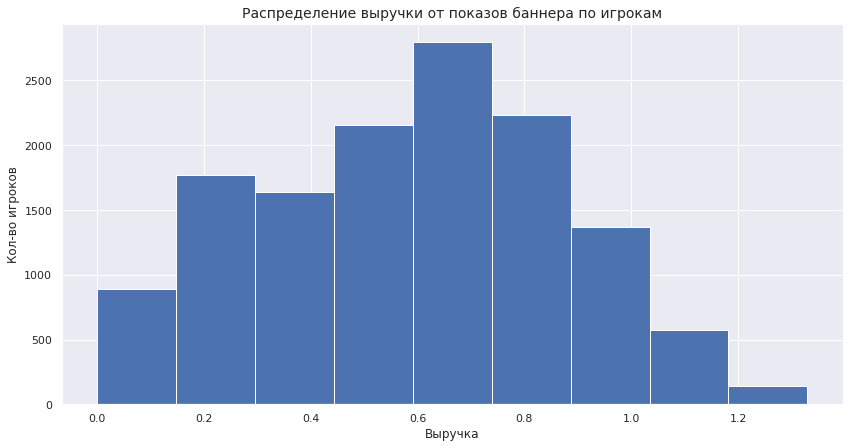

In [44]:
plt.figure(figsize=(14,7))
user_buildings['income'].hist(bins=9)
plt.title('Распределение выручки от показов баннера по игрокам', fontsize='14')
plt.xlabel('Выручка')
plt.ylabel('Кол-во игроков')
plt.show()

При такой модели монетизации доход от показов баннера также покрывает рекламу, однако, вероятный отток из-за введения рекламы, наверняка, приведет к убыткам.

Повторим расчеты при условии, что цена баннера будет увеличена до 0.1, а показы баннера будут происходить только в двух случаях открытия экрана постройки зданий из трех.

In [45]:
price_show = 0.1
user_buildings['income'] = (user_buildings['event'] * (2/3)) * price_show

print('При показах рекламы в 2/3 случаев постройки месячный доход может составить:',
      user_buildings['income'].sum().astype('int'))

print('Суммарные затраты на рекламу составили:',cac['cost'].sum().astype('int'))

print( 'Возможная выручка модели:',
      ((user_buildings['income'].sum().astype('int') - cac['cost'].sum().astype('int'))/cac['cost'].sum().astype('int')).round(3)*100, '%')

При показах рекламы в 2/3 случаев постройки месячный доход может составить: 8530
Суммарные затраты на рекламу составили: 7603
Возможная выручка модели: 12.2 %


### Вывод

Мы рассмотрели три возможных модели монетизации исходя из разной цены рекламного баннера и количества показов на экране постройки зданий:

* Наиболее выгодной выглядит третья модель, в которой цена рекламного баннера увеличена до 0.1, а показы происходят лишь в 2х из трех случаях постройки зданий. Такая модель минимизирует отток из-за рекламы, полностью окупает рекламные расходы и могла бы принести выручку до 12% (8530) от игроков первой когорты. Однако, согласно уточненным условиям, мы не можем менять стоимость рекламы. Модель отвергается.

* При текущей цене за баннер (0.07) и показах начиная со второй постройки здания, расходы на привлечение игроков окупились бы только при сохранении текущего оттока (что выглядит маловероятным), выручка составила бы до 5.3 % (8006). Прелагаем взять на вооружение данную модель, но также разработать стратегии сокращения возможного оттока и добавить дополнительные способы монетизации, такие как прямая покупка игровой валюты, платный уход от рекламы и др.

<a id="summary"></a>
## 7. Общий вывод и рекомендации

Данные об игре были открыты и изучены:
* В таблице events 135640 записей
* В таблице costs 28 записей
* В таблице traffic 13576 записей.

Была произведена предобработка данных:
* Избавились от дубликатов
* Типы данных с колонками дат приведены к корректным
* Обнаружены пропуски, не требующие заполнения.

Произведен исследовательский анализ данных. Рассмотрены основные характеристики датасетов. Мы увидели, что:
* период логирования действий игроков охватывает с 4 мая по 5 июня 2020 г. Уникальных пользователей 13576. 
* данные о рекламной кампании имеются за период c 3 мая по 9 мая.
* средние затраты составили 271. Разброс затрат большой: от 23 до 969, разброс подтверждается также высоким стандартным отклонением (286).
* данные по исчточнику траффика имеются по всем (13576) уникальным пользователм датасета. Всего 4 источника.

Показано рапределение типов событий
* 128 тыс. (около 94%) событий приходится на строительство зданий, 5817 (около 4.5%) событий на факт прохождения первого уровеня, только 1866 (около 1.5%) событий на факт реализации проекта.
* около 43% среди всех пользователей прошли первый уровень, из них около 32% прошли его через реализацию проекта. Соответственно, среди прошедших первый уровень остальные две трети игроков выбрали военный путь достижения цели.

Показано рапределение типа построек
* 59 тыс. построек (около 46%) приходится на spaceport, 54 тыс. (около 43%) на assembly_shop и только 14 тыс. (около 11%) на research_center.

Рассмотрена ежедневная активность пользователей (DAU) в разрезе источников траффика:
* В первую неделю наблюдается рост активности по всем каналам в связи с рекламной кампанией. После 10 мая по ее завершению виден резкий спад активности, продолжающийся вплоть до конца периода исследования, что быть связано с прохождением первого уровня, который к 25 маю почти все пользователи преодолели, либо забросили игру.
* Наибольшая активность видна среди пользователей пришедших из канала yandex_direct, на втором месте из instagram. 
* Активность траффика из остальных каналов примерно одинакова.

Было оценено удержание пользователей (Retention Rate):
* На третьей неделе средний Retention Rate по когортам составил уже 44%, а затем резко уменьшается до 6%. 
* Вероятно, спад связан с прохождением уровня у одних пользователей и отсутствием дальнейшего интереса у других. 
* Когорта от 5 мая ведет себя лучше других, особенно это заметно на 2-ю неделю жизни.

Была оценена CAC (стоимость привлечения клиента)
* Общие затраты на рекламу составили около 3300 в первый день, а затем снижались вплоть до 152 в последний день периода. При этом затраты по каналу yandex_direct всегда немного опережали другие каналы. Меьшего всего (во всем периоде) было потрачено на рекламу по youtube_channel_reklama.
* Наименьший CAC (0.4) получился у канала youtube_channel_reklama. Самым дорогим оказался facebook_ads (0.79) - стоит провести дополнительное исследование по вопросу перераспределения средств на маркетинг.

Произведена оценка влияния событий на завершение первого уровня.
* в среднем, игроки-строители проводят в игре на 2.6 дня больше, чем игроки-воины (13 дней против 10.6 дней). Можно сказать, что игроки-строители - наиболее ценные пользователи с точки зрения удержания и монетизации. 
* также мы выяснили, что среднее время до оттока у остальных игроков - 9.3 дня. Вероятно, этим игрокам надоедает процесс строительства, возможно для них особенно актуален был бы платный ускоритель развития.

Осуществлена проверка гипотез:
* есть статистически значимое различие по времени прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком. 
* нет статистически значимой разницы по времени прохождения уровня между пользователями, пришедшими из разных источников траффика
* поскольку стратегия pvp явно популярнее среди игроков, возникает игровой дисбаланс, который в конечном счете может привести к  потерям прибыли. Рекомендуем геймдизайнерам по возможности сократить дисбаланс в выборе стратегий победы.

Рассмотрены несколько вариантов модели монетизации исходя из разной цены рекламного баннера и количества показов на экране постройки зданий:
* Наиболее выгодной выглядит третья модель, в которой цена рекламного баннера увеличена до 0.1, а показы происходят лишь в 2х из трех случаях постройки зданий. Такая модель минимизирует отток из-за рекламы, полностью окупает рекламные расходы и могла бы принести выручку до 12% (8530) от игроков первой когорты.
* При текущей цене за баннер (0.07) и показах начиная со второй постройки здания, расходы на привлечение игроков окупились бы только при сохранении текущего оттока (что выглядит маловероятным), выручка составила бы до 5.3 % (8006).

**Рекомендации:**

* Среди игроков 57% не добрались до конца первого уровня. Рекомендуем добавить возмоность покупки ускорителей развития за игровую валюту, а также уникальный контент для повышения интереса к игре у таких игроков.
* Наиболее ценными игроками с точки зрения монетизации являются игроки-строители, так как они проводят в среднем на 2.6 дней больше времени в игре. В то же время таких игроков в 2 раза меньше, чем игроков-воинов. Рекомендуем стимулировать игроков больше строить и меньше воевать, например, увеличив сложность через победу над другими игроками при минимальном количестве построек, а также предоставляя игровой бонус через победу засчет проекта.
* Среди рекламных источников самым эффективным с точки зрения затрат (CAC) можно считать youtube_channel_reklama  (0.4 в среднем за игрока), а самым дорогим -facebook_ads (0.78 в среднем за игрока). Рекомендуем уменьшить затраты по каналу facebook_ads и увеличить по каналу youtube_channel_reklama.
* Рекомендуемая модель монетизации: при текущей цене за баннер (0.07) и показах начиная со второй постройки здания, расходы на привлечение игроков окупились бы только при сохранении текущего оттока, выручка составила бы до 5.3 % (8006), однако, с учетом невозможности изменения цены баннера, прелагаем взять на вооружение данную модель, но также разработать стратегии сокращения возможного оттока и рассмотреть дополнительные способы монетизации.
* Дополнительно стоит рассмотреть возможность показов рекламы на других экранах, а также показывать дорогую видео-рекламу при завершении уровня.
* Кроме того, нужно предусмотреть возможность платного отключения рекламы. Это повысит монетизацию и может понизить отток самых увлеченных игроков.
* По предложенным обновлениям рекомендуем провести A/B тесты прежде, чем реализовывать их для всех игроков.

<a id="summary2"></a>
## 7. Дашборд и презентация

**Дашборд**

https://public.tableau.com/views/final_project_game/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

**Презентация**

https://disk.yandex.ru/i/THpHHOcdKu2oTw